### Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from tqdm import tqdm_notebook as tqdm

### Code

In [3]:
PATH='data/sample/'
sz = 224
def check_accuracy():
    log_preds, y = learn.TTA()
    probs = np.mean(np.exp(log_preds), 0)
    print(accuracy_np(probs, y))

In [4]:
arch=resnet34
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms)

### Training the last layer

In [5]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [9]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

/Users/alex/Git_Files/shopee_com/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


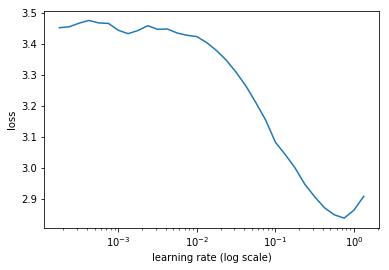

In [10]:
learn.sched.plot()

In [11]:
lr = 1e-1

In [12]:
learn.fit(lr, 10, cycle_save_name='1.1_zoom_ps5', best_save_name='1.1_zoom_best_ps5')

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

/Users/alex/Git_Files/shopee_com/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


epoch      trn_loss   val_loss   accuracy   
    0      2.023501   1.363001   0.582972  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    1      1.580087   1.033803   0.642419  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    2      1.311331   1.03961    0.635692  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    3      1.091166   0.9797     0.667289  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    4      0.998232   1.024224   0.65939   


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    5      0.946277   0.987065   0.662457  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    6      0.891243   0.953816   0.679774  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    7      0.834438   0.992523   0.663961  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    8      0.822826   1.017784   0.665119  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    9      0.763933   1.016466   0.667795  



[1.0164663, 0.6677952]

In [13]:
'''
Try loading the saved model
'''
learn.load('1.1_zoom_best_ps5')
check_accuracy()

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

0.6797222949960702


In [6]:
learn.precompute=False

In [15]:
learn.fit(lr, 5, cycle_len=1, cycle_save_name='1.1_zoom_ps5', best_save_name='1.1_zoom_ps5_best')

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

/Users/alex/Git_Files/shopee_com/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


epoch      trn_loss   val_loss   accuracy   
    0      1.01352    0.93716    0.672541  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    1      0.969433   0.908617   0.68342   


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    2      0.930376   0.893029   0.690003  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    3      0.891703   0.914105   0.682841  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    4      0.894503   0.912736   0.677242  



[0.91273576, 0.67724246]

In [16]:
learn.load('1.1_zoom_ps5_best')
check_accuracy()

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

0.7010741419963322


### Fine tuning on all weights

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

/Users/alex/Git_Files/shopee_com/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


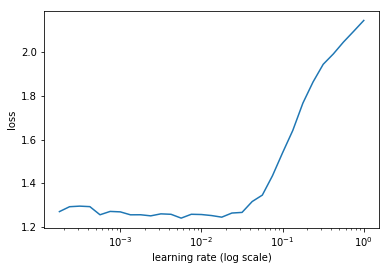

In [17]:
learn.unfreeze()
learn.lr_find()
learn.sched.plot()

In [7]:
lr = [1e-5, 1e-4, 5e-3]

In [18]:
lr = [1e-5, 1e-4, 5e-3]
learn.fit(lr, 2, cycle_len=1, cycle_mult=2, cycle_save_name='1.1_zoom_ft_ps5', best_save_name='1.1_zoom_ft_ps5_best')

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

/Users/alex/Git_Files/shopee_com/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


Exception in thread Thread-9:
Traceback (most recent call last):
  File "/Users/alex/miniconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/alex/miniconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/alex/miniconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy   
    0      1.258291   1.074266   0.631858  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    1      1.206662   1.038596   0.638629  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    2      1.149259   1.02843    0.640582  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    3      1.103284   0.986443   0.653921  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    4      1.092896   0.967929   0.660952  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    5      1.044769   0.956139   0.663108  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    6      1.009444   0.957635   0.665394  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    7      0.984101   0.942563   0.671311  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    8      0.941807   0.923686   0.673785  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    9      0.916524   0.908996   0.680946  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    10     0.899864   0.902877   0.682509  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    11     0.893031   0.89914    0.68355   


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    12     0.863774   0.894651   0.684332  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    13     0.846055   0.891426   0.688368  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    14     0.868007   0.896425   0.685764  



[0.89642525, 0.68576396]

In [8]:
learn.load('1.1_zoom_ft_ps5_best')
#check_accuracy()

In [9]:
learn.fit(lr, 2, cycle_len=8, cycle_mult=2, cycle_save_name='1.1_zoom_ft_ps5_2', best_save_name='1.1_zoom_ft_ps5_best_2')

HBox(children=(IntProgress(value=0, description='Epoch', max=24), HTML(value='')))

HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

/Users/alex/Git_Files/shopee_com/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


epoch      trn_loss   val_loss   accuracy   
    0      0.836595   0.894182   0.685315  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    1      0.84056    0.895871   0.68439   


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    2      0.832136   0.889702   0.686936  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    3      0.836972   0.888719   0.685764  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    4      0.830083   0.888943   0.686024  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    5      0.80738    0.891571   0.686473  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    6      0.801267   0.890047   0.686603  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    7      0.810066   0.888012   0.686415  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    8      0.787176   0.886792   0.687775  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    9      0.793793   0.890278   0.685822  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    10     0.800643   0.886198   0.685822  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    11     0.807153   0.888205   0.686994  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    12     0.794795   0.889388   0.685822  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    13     0.803665   0.88476    0.688759  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    14     0.791746   0.882672   0.688628  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    15     0.788449   0.884152   0.689077  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    16     0.773617   0.884456   0.688166  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    17     0.79005    0.886625   0.687645  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    18     0.781907   0.885599   0.687326  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    19     0.778192   0.886018   0.687775  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    20     0.788054   0.885097   0.687978  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    21     0.785422   0.88412    0.688296  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    22     0.793357   0.890277   0.686864  


HBox(children=(IntProgress(value=0, max=48), HTML(value='')))

    23     0.808915   0.888766   0.688166  



[0.8887665, 0.68816555]

###  Analyzing results

In [11]:
check_accuracy()

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

0.7060518731988472


In [10]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

In [ ]:
# %prun
print(log_preds.shape)
print(probs.shape)

In [ ]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [ ]:
probs = np.log(probs)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [ ]:
plot_confusion_matrix(cm, (range(1,19)))

In [ ]:
print('Bad categories')
print(data.classes[11], data.classes[7])
print(data.classes[12], data.classes[10])
print(data.classes[9], data.classes[15])
print(data.classes[6], data.classes[8])

In [ ]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds==data.val_y)==is_correct)
def load_img_id(ds, idx): return PIL.Image.open(PATH+ds.fnames[idx])
def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [ ]:
'''
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]
def most_by_correct(y, is_correct):
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y==y), mult)
'''

### Extensions

In [ ]:
'''
3) add some dropout (do we train from scratch?, i think so..)
3) try resnext 
4) try all data
'''
'''
!) Add more transforms
2) try super resolution 
'''